In [1]:
# Use Erdos_Spring_2025 conda env as created
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [3]:
# path to the dataset
file_path = "Dry_Eye_Dataset.csv"

# Load the latest version of the file
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dakshnagra/dry-eye-disease",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/var/folders/h4/8_8xkn4579zbrdb79s7zrtl00000gp/T/ipykernel_20986/4216995525.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [4]:
#Import some packages for visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,132/64,91,20000,88,200,...,Y,Y,Y,Y,3.8,N,Y,N,Y,Y
19996,F,39,7.3,3,4,101/75,65,2000,53,195,...,N,Y,Y,N,3.8,N,N,Y,N,Y
19997,F,20,8.0,5,3,124/63,78,10000,17,186,...,Y,Y,N,N,8.4,N,N,Y,N,N
19998,M,38,4.5,3,3,136/70,60,3000,115,170,...,Y,N,Y,N,2.2,N,N,N,Y,Y


In [6]:
df.columns

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Blood pressure', 'Heart rate', 'Daily steps', 'Physical activity',
       'Height', 'Weight', 'Sleep disorder', 'Wake up during night',
       'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption',
       'Smoking', 'Medical issue', 'Ongoing medication',
       'Smart device before bed', 'Average screen time', 'Blue-light filter',
       'Discomfort Eye-strain', 'Redness in eye',
       'Itchiness/Irritation in eye', 'Dry Eye Disease'],
      dtype='object')

In [26]:
df['Sleep disorder'].value_counts()

Sleep disorder
N    10069
Y     9931
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

From above, there are no missing data.

## DATA PREPROCESSING

In [19]:


# Using 'Sleep disorder' column to define Insomnia
df['Insomnia'] = df['Sleep disorder'].apply(lambda x: 1 if x == 'Y' else 0)

# Classifying into Groups
def classify_group(row):
    if row['Dry Eye Disease'] == 'Y' and row['Insomnia'] == 1:
        return 'Both'  # Both DED and Insomnia
    elif row['Dry Eye Disease'] == 'Y' and row['Insomnia'] == 0:
        return 'DED'  # Only DED
    elif row['Dry Eye Disease'] == 'N' and row['Insomnia'] == 1:
        return 'Insomnia'  # Only Insomnia
    else:
        return 'None'  # No disease (Neither DED nor Insomnia)

# Create the 'Group' column
df['Group'] = df.apply(classify_group, axis=1)

df

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Insomnia,Group
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,Y,N,8.7,N,Y,Y,N,Y,1,Both
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,Y,N,9.6,Y,N,N,Y,Y,0,DED
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,Y,4.0,N,Y,N,N,N,1,Insomnia
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,N,7.6,N,Y,N,Y,N,0,None
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,N,3.5,N,Y,Y,N,Y,0,DED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,132/64,91,20000,88,200,...,Y,Y,3.8,N,Y,N,Y,Y,0,DED
19996,F,39,7.3,3,4,101/75,65,2000,53,195,...,Y,N,3.8,N,N,Y,N,Y,1,Both
19997,F,20,8.0,5,3,124/63,78,10000,17,186,...,N,N,8.4,N,N,Y,N,N,0,None
19998,M,38,4.5,3,3,136/70,60,3000,115,170,...,Y,N,2.2,N,N,N,Y,Y,0,DED


In [20]:
df['Group'].value_counts()

Group
DED         6551
Both        6486
None        3518
Insomnia    3445
Name: count, dtype: int64

## DATA VISUALIZATION

/var/folders/h4/8_8xkn4579zbrdb79s7zrtl00000gp/T/ipykernel_20986/3389023395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Group', data=df, palette='Set2')


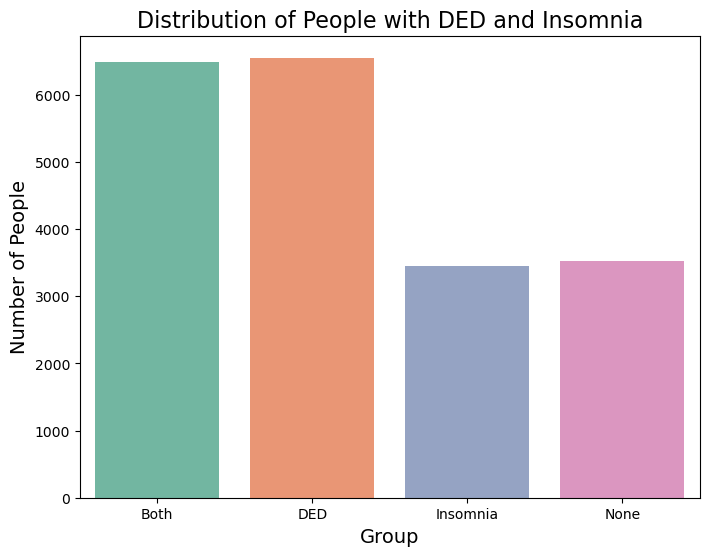

In [24]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Group', data=df, palette='Set2')

plt.title('Distribution of People with DED and Insomnia', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.show()

Converting categorical data to numerical: